# Gravitational Lensing

This notebook is an outline of my results for the PHYS4007 Scientific Computing module final project.

The project is aimed at generating an isothermal ellipsoid gravitational lens model, which serves as a good approximation for a galaxy cluster lens. The effects of this model on the background space is then observed.

The first step is to define the lensing algorithm, which will produce a lensed image of a source point alligned with the lens. The result should be an Einstein ring of a specific radius

Note: for purpose of saving space, all used functions are defined in a separate file, "functions.py", which is then imported as a dependency

First, install necessary packages.

In [1]:
%pip install scipy tqdm opencv-python Pillow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## Validation test

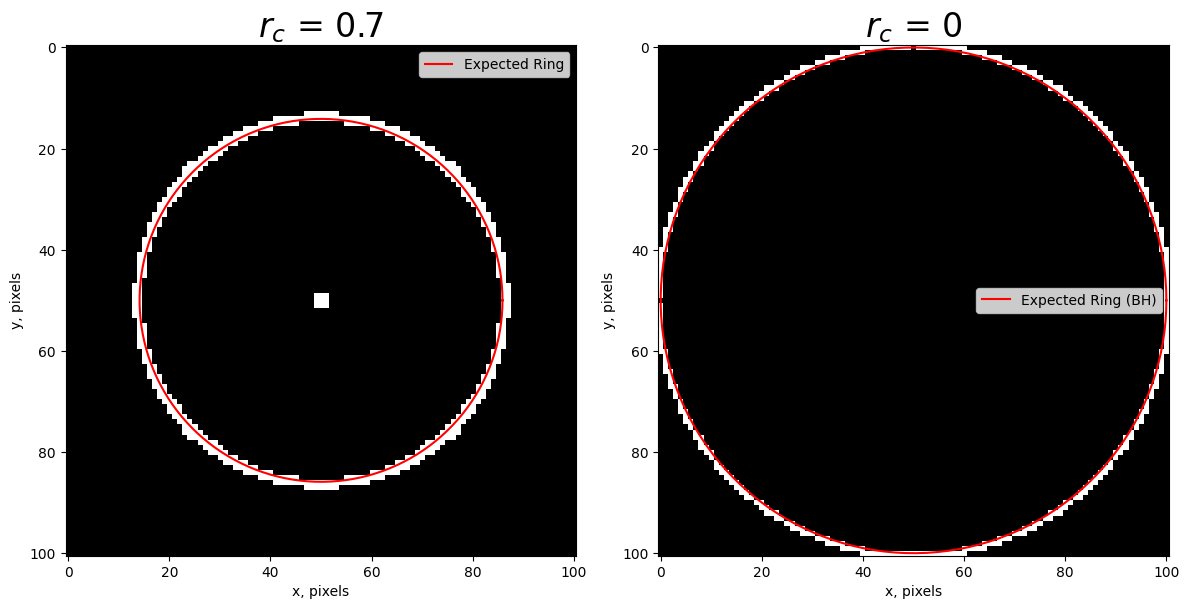

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import functions as fnc

pxl = 101 # amount of pixels, e.g. size of the source image

src = np.zeros((pxl , pxl, 3), dtype=np.float64) # source plane



if pxl%2==1:  # need to make sure even size of the image
              # does not mess up the output image
    src[int((pxl-1)/2), int((pxl-1)/2)] = 1.0 # if odd, set central pixel to 1.0
else:
    # if even, set the four central pixels to 1.0
    src[int((pxl)/2)-1 : int((pxl)/2)+1, int((pxl)/2)-1 : int((pxl)/2)+1] = 1.0


# Initial parameters

sigma = 1500000 # /(3.0857e16) #pc/s
Rc = 70000 # h^-1 pc
Ds = 878 # h^-1 Mpc
Dl = 637 # h^-1 Mpc
Dls = 441 # h^-1 Mpc
c = 3e8 # m/s

Epsilon = 0

Theta_E = 4*np.pi*(sigma**2)*((Dls)/((c**2)*Ds)) # Einstein Radius

rc = (Rc)/((Dl*10**6)*(Theta_E)) # Lens core radius
rc_bh = 0.0 # Can approximate a Black Hole lens
            # by settong reduced radius to 0.0

r_crc = (1-rc**2)**0.5 # calculate radius of an Einstein ring in reduced coordinates
                       # to compare with produced image
r_crc_bh = (1-rc_bh**2)**0.5

img = fnc.lens(src, rc = rc, eps = Epsilon) # lens the source image using pre-defined function
img_bh = fnc.lens(src, rc = rc_bh, eps = Epsilon)


th = np.linspace( 0 , 2 * np.pi , 150 ) # Define parameters for circle to compare 
                                        # lensed image with
x = r_crc*int(pxl/2) * np.cos(th) + int(pxl/2)
y = r_crc*int(pxl/2) * np.sin(th) + int(pxl/2)

xx = r_crc_bh*int(pxl/2) * np.cos(th) + int(pxl/2) # for BH
yy = r_crc_bh*int(pxl/2) * np.sin(th) + int(pxl/2)


fig = plt.figure(figsize=(12,8))


ax1 = fig.add_subplot(121)
ax1.plot(x, y, color='r', label='Expected Ring')
ax1.legend()
ax1.imshow(img)
ax1.set_title("$r_c$ = {}".format(round(rc, 2)), fontsize=24)
ax1.set_xlabel("x, pixels")
ax1.set_ylabel("y, pixels")

ax2 = fig.add_subplot(122)
ax2.plot(xx, yy, color='r', label='Expected Ring (BH)')
ax2.legend()
ax2.imshow(img_bh)
ax2.set_title("$r_c$ = 0", fontsize=24)
ax2.set_xlabel("x, pixels")
ax2.set_ylabel("y, pixels")


plt.tight_layout() # makes plot compatible with different resolutions
plt.show()

The validation test passed, produced image matches the expected Einstein Ring radius

## Additions

We can now produce lensed images using the defined algorithm

Before applying lensing algorithm to images, can determine which alignment gives the most distorted image

Columns done: 100%|██████████| 101/101 [00:05<00:00, 17.60it/s]


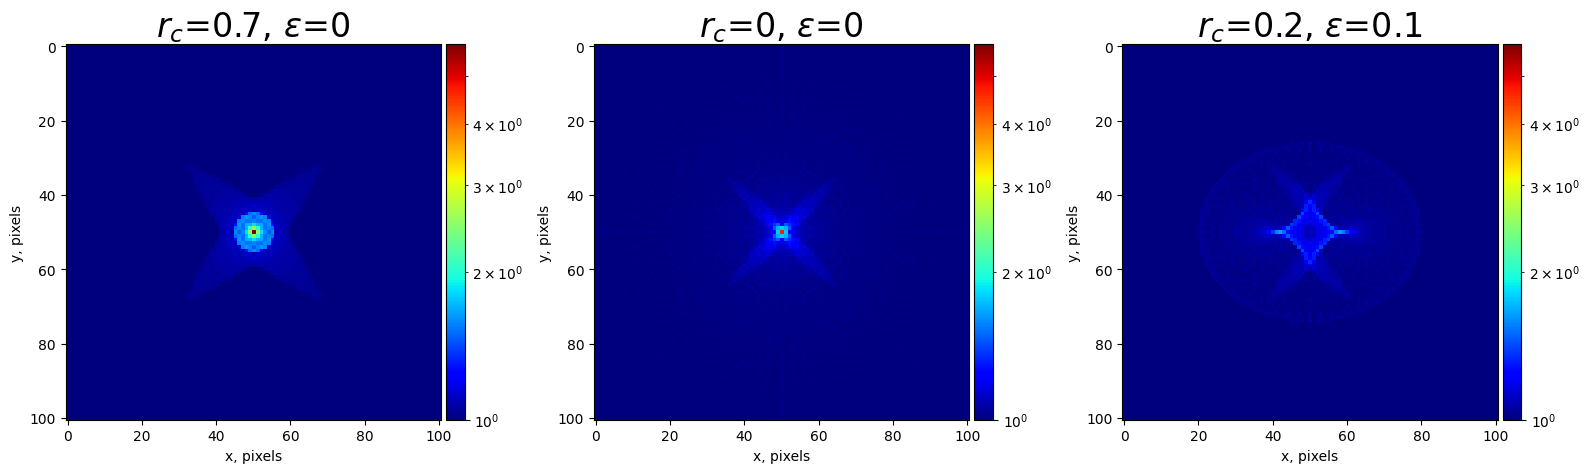

In [3]:
from matplotlib.colors import LogNorm # need this for more clear colormapping
from mpl_toolkits.axes_grid1 import make_axes_locatable # need this to add colorbars to the plots

# produce plots using pre-defined function
dist_vals = fnc.alignment_map(pxl, rc, Epsilon, 1, pbar="Y")
dist_vals_bh = fnc.alignment_map(pxl, 0, Epsilon, 1, pbar="Y")
dist_vals_rc02_eps01 = fnc.alignment_map(pxl, 0.2, 0.1, 1, pbar="Y")



fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)




plot1 = ax1.imshow(dist_vals+1, cmap='jet', norm=LogNorm(1, dist_vals.max()+1)) # add one to account for log(0) values
ax1.set_aspect("equal") # helps square image to remain square
ax1.set_xlabel("x, pixels")
ax1.set_ylabel("y, pixels")
ax1.set_title("$r_c$={}, $\epsilon$=0".format(round(rc,2)), fontsize=24)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot1, cax=cax1, orientation='vertical')

plot2 = ax2.imshow(dist_vals_bh+1, cmap='jet', norm=LogNorm(1, dist_vals.max()+1))
ax2.set_aspect("equal")
ax2.set_xlabel("x, pixels")
ax2.set_ylabel("y, pixels")
ax2.set_title("$r_c$=0, $\epsilon$=0", fontsize=24)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot2, cax=cax2, orientation='vertical')

plot3 = ax3.imshow(dist_vals_rc02_eps01+1, cmap='jet', norm=LogNorm(1, dist_vals.max()+1))
ax3.set_aspect("equal")
ax3.set_xlabel("x, pixels")
ax3.set_ylabel("y, pixels")
ax3.set_title("$r_c$=0.2, $\epsilon$=0.1", fontsize=24)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot3, cax=cax3, orientation='vertical')



plt.tight_layout()
plt.show()

Map allows us to see caustics - regions where the image gets distorted to appear like two (outer caustic) or four (inner caustic) separate images.

Can visualise them more clearly

Columns done: 100%|██████████| 101/101 [00:03<00:00, 31.60it/s]


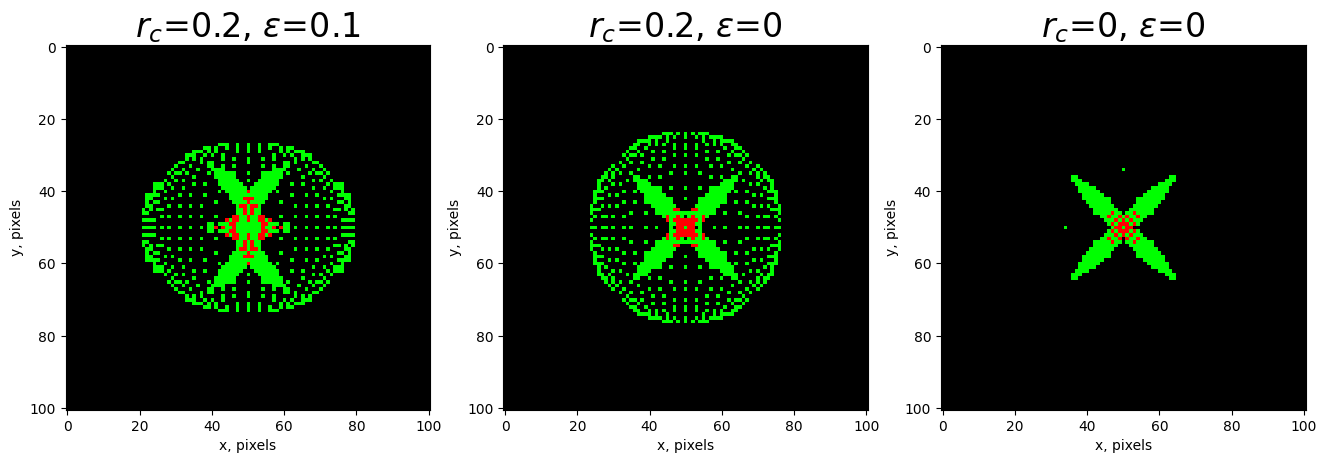

In [4]:
# find caustic patterns using pre-defined function
# (using different rc & lens ellipticity)
ptrns_eps01_rc02 = fnc.caustic_pattern(pxl, 0.1, 0.2, rng=1)
ptrns_eps0_rc02 = fnc.caustic_pattern(pxl, 0.0, 0.2, rng=1)
ptrns_eps0_rc0 = fnc.caustic_pattern(pxl, 0.0, 0.0, rng=1)


fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


ax1.imshow(ptrns_eps01_rc02)
ax1.set_aspect("equal")
ax1.set_xlabel("x, pixels")
ax1.set_ylabel("y, pixels")
ax1.set_title("$r_c$=0.2, $\epsilon$=0.1", fontsize=24)


ax2.imshow(ptrns_eps0_rc02)
ax2.set_aspect("equal")
ax2.set_xlabel("x, pixels")
ax2.set_ylabel("y, pixels")
ax2.set_title("$r_c$=0.2, $\epsilon$=0", fontsize=24)


ax3.imshow(ptrns_eps0_rc0)
ax3.set_aspect("equal")
ax3.set_xlabel("x, pixels")
ax3.set_ylabel("y, pixels")
ax3.set_title("$r_c$=0, $\epsilon$=0", fontsize=24)


plt.show()

Visually, we can see how position of source is affected by the lens depending on whether the source is or is not within the caustic.

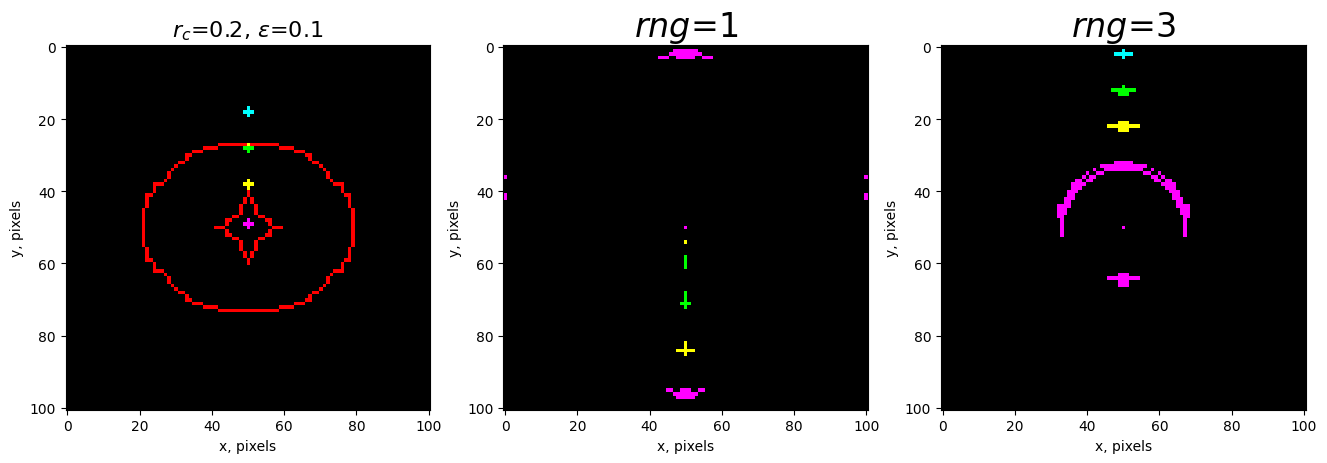

In [5]:
# create a caustic contour object
contour = fnc.caustic_contours(ptrns_eps01_rc02)

# create empty plane in RGB
source = np.zeros(shape=(pxl, pxl, 3))

# define points for little stars of different colours
cntr_b = np.vstack([[50, 18],[50, 19],[50, 17],[51, 18],[49, 18]])
cntr_g = np.vstack([[50, 28],[50, 29],[50, 27],[51, 28],[49, 28]])
cntr_y = np.vstack([[50, 38],[50, 39],[50, 37],[51, 38],[49, 38]])
cntr_v = np.vstack([[50, 49],[50, 48],[50, 50],[51, 49],[49, 49]])

# colour the points in the source plane
source[cntr_b[:,1], cntr_b[:,0]]=[0,1,1]
source[cntr_g[:,1], cntr_g[:,0]]=[0,1,0]
source[cntr_y[:,1], cntr_y[:,0]]=[1,1,0]
source[cntr_v[:,1], cntr_v[:,0]]=[1,0,1]

# lens the source plane with different parameters
lensed_rng1 = fnc.lens(source, 0.2, 0.1, 3, 1)
# Difference between the two is range of reduced coordinate plane
# first goes from -1 to 1, second from -3 to 3
lensed_rng3 = fnc.lens(source, 0.2, 0.1, 3, 3)

# add the contours to source plane to see if the stars
# are within caustics or not
source+=contour


fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


ax1.imshow(source)
ax1.set_aspect("equal")
ax1.set_xlabel("x, pixels")
ax1.set_ylabel("y, pixels")
ax1.set_title("$r_c$=0.2, $\epsilon$=0.1", fontsize=16)


ax2.imshow(lensed_rng1)
ax2.set_aspect("equal")
ax2.set_xlabel("x, pixels")
ax2.set_ylabel("y, pixels")
ax2.set_title("$rng$=1", fontsize=24)


ax3.imshow(lensed_rng3)
ax3.set_aspect("equal")
ax3.set_xlabel("x, pixels")
ax3.set_ylabel("y, pixels")
ax3.set_title("$rng$=3", fontsize=24)


plt.show()

Can now apply the lens to images to see the distortions. Let's create a source image of random distriburion of galaxies using pre-defined function.

To get a better view of distortions, can apply lenses to a coloured "chessboard"

The image was produced by "chessboard" function.

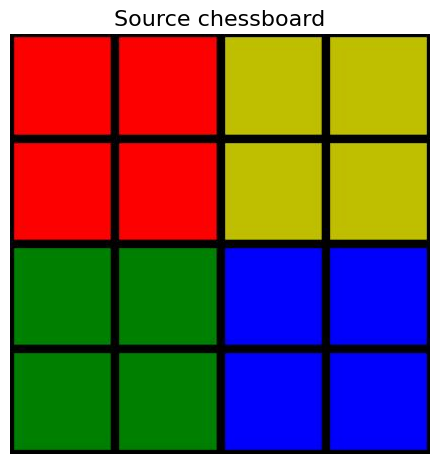

In [6]:
from PIL import Image

# load image into numpy array, normalize pixel values for floats
img_clr = np.array(Image.open('./chssbrd.jpg'))/255

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)

ax1.imshow(img_clr)
ax1.set_axis_off()
ax1.set_title("Source chessboard", fontsize=16)
plt.show()

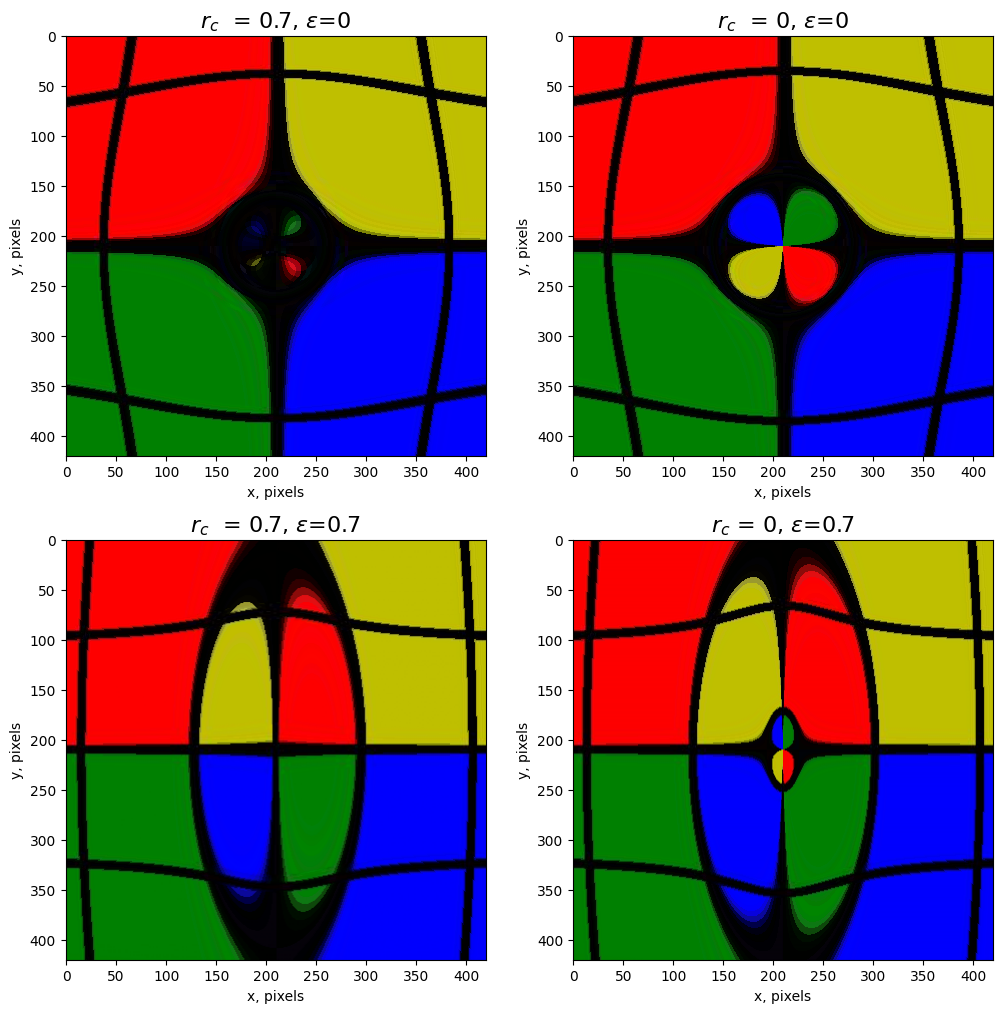

In [7]:

# lens the chessboard image using different parameters
lnsd = fnc.lens(img_clr, rc=rc, eps=0, rng=3)
lnsd_0 = fnc.lens(img_clr, rc=0, eps=0, rng=3)

lnsd_eps = fnc.lens(img_clr, rc=rc, eps=0.7, rng=3)
lnsd_eps_0 = fnc.lens(img_clr, rc=0, eps=0.7, rng=3)




fig = plt.figure(figsize=(12,12))


ax2 = fig.add_subplot(221)
ax3 = fig.add_subplot(222)

ax4 = fig.add_subplot(223)
ax5 = fig.add_subplot(224)



ax2.imshow(lnsd)
ax2.set_title("$r_c$  = {}, $\epsilon$=0".format(round(rc, 2)), fontsize=16)
ax2.set_xlabel("x, pixels")
ax2.set_ylabel("y, pixels")

ax3.imshow(lnsd_0)
ax3.set_title("$r_c$  = 0, $\epsilon$=0", fontsize=16)
ax3.set_xlabel("x, pixels")
ax3.set_ylabel("y, pixels")

ax4.imshow(lnsd_eps)
ax4.set_title("$r_c$  = {}, $\epsilon$=0.7".format(round(rc, 2)), fontsize=16)
ax4.set_xlabel("x, pixels")
ax4.set_ylabel("y, pixels")

ax5.imshow(lnsd_eps_0)
ax5.set_title("$r_c$ = 0, $\epsilon$=0.7", fontsize=16)
ax5.set_xlabel("x, pixels")
ax5.set_ylabel("y, pixels")



plt.show()

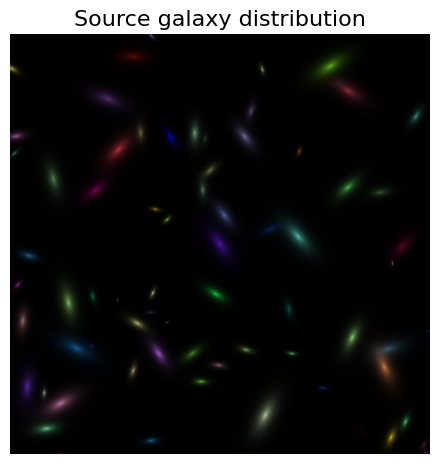

In [8]:
size = 1000 # bigger size for better quality

# Need separate ellipticities for galaxy generator
# function and for the lens.

Epsilon_gal = 0.9 # ellipticity of galaxies
Epsilon_lens = 0.0 # ellipticity of lens
N_gal = 70


gal = fnc.gal_dist(size, N_gal, 8, Epsilon_gal, seed="Y")



fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)

ax1.imshow(gal)
ax1.set_axis_off()
ax1.set_title("Source galaxy distribution", fontsize=16)

plt.show()

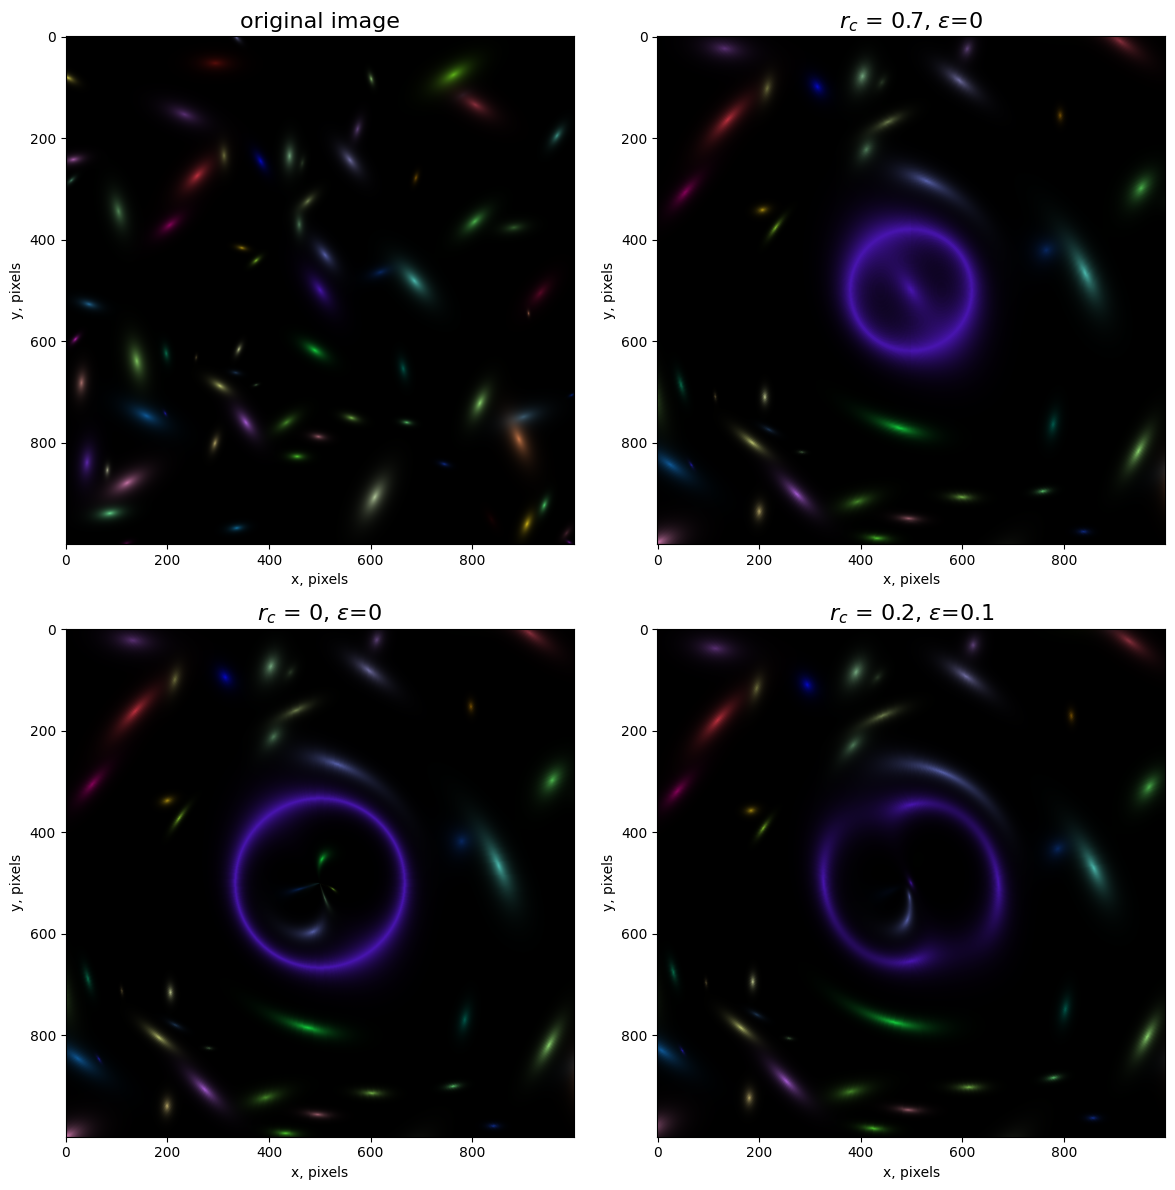

In [9]:
lnsd_rc = fnc.lens(gal, rc=rc, eps=Epsilon_lens, rng=3)
lnsd_rc0_eps0 = fnc.lens(gal, rc=0, eps=Epsilon_lens, rng=3)

lnsd__rc02_eps01 = fnc.lens(gal, rc=0.2, eps=0.1, rng=3)
lnsd__rc0_eps01 = fnc.lens(gal, rc=0, eps=0.1, rng=3)


fig = plt.figure(figsize=(12,12))


ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.imshow(gal)
ax1.set_title("original image", fontsize=16)
ax1.set_xlabel("x, pixels")
ax1.set_ylabel("y, pixels")

ax2.imshow(lnsd_rc)
ax2.set_title("$r_c$ = {}, $\epsilon$=0".format(round(rc, 2)), fontsize=16)
ax2.set_xlabel("x, pixels")
ax2.set_ylabel("y, pixels")

ax3.imshow(lnsd_rc0_eps0)
ax3.set_title("$r_c$ = 0, $\epsilon$=0", fontsize=16)
ax3.set_xlabel("x, pixels")
ax3.set_ylabel("y, pixels")

ax4.imshow(lnsd__rc02_eps01)
ax4.set_title("$r_c$ = 0.2, $\epsilon$=0.1", fontsize=16)
ax4.set_xlabel("x, pixels")
ax4.set_ylabel("y, pixels")



plt.tight_layout()

plt.show()

Apply the lenses to some real images

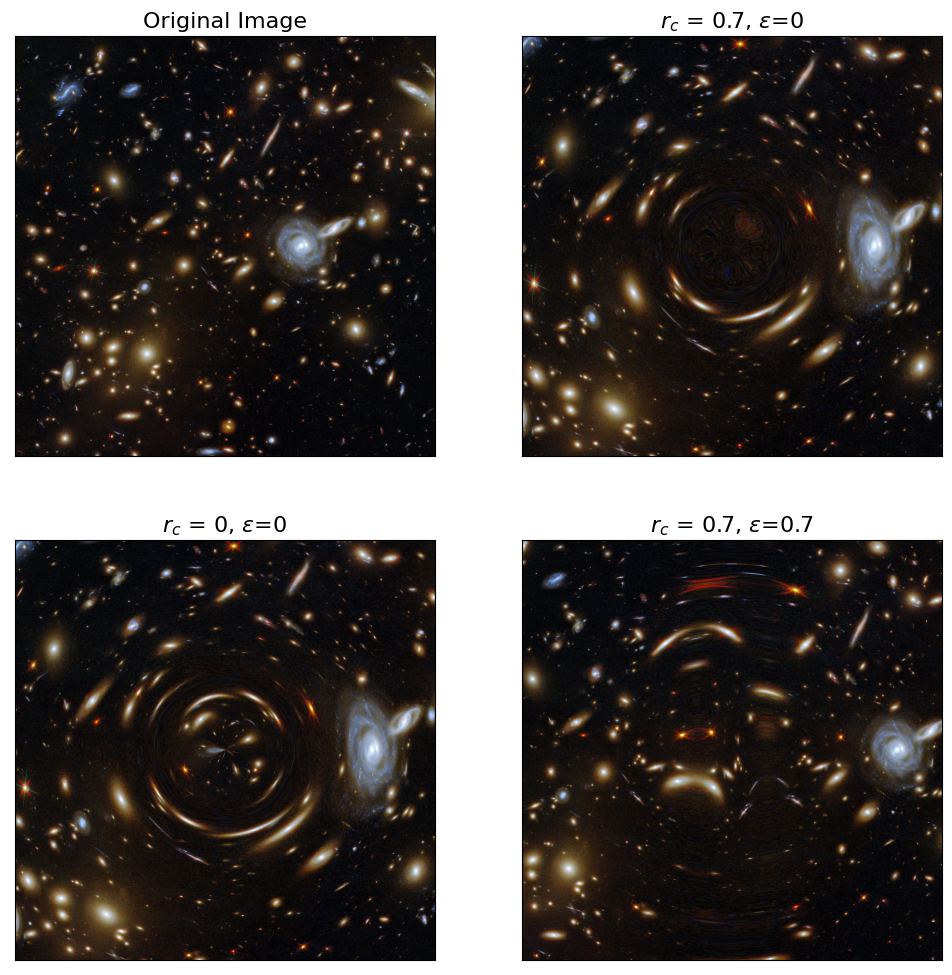

In [10]:
#===============================================================================================
#|               Image credits:                                                                |
#|                                                                                             |
#|    https://www.nasa.gov/image-feature/goddard/2021/hubble-gazes-at-a-galactic-menagerie     |
#|                                                                                             |
#===============================================================================================


# set to 0.7 to see better comparison with chessboard image
rc = 0.7


# read in the image of the source as a numpy array and get its size
image = Image.open('./potw2120a.jpg')
image = image.crop([0, 0, np.shape(image)[0], np.shape(image)[0]])
image = np.array(image)


lensed_rc07_eps0 = fnc.lens(image, rc, 0, chnls = 3, rng = 3)/255
lensed_rc0_eps0 = fnc.lens(image, 0, 0, chnls = 3, rng = 3)/255
lensed_rc07_eps07 = fnc.lens(image, rc, 0.7, chnls = 3, rng=3)/255




fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(image)
ax1.set_title("Original Image", fontsize=16)


ax2 = fig.add_subplot(222)
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(lensed_rc07_eps0)
ax2.set_title("$r_c$ = 0.7, $\epsilon$=0", fontsize=16)


ax3 = fig.add_subplot(223)
ax3.set_aspect('equal')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.imshow(lensed_rc0_eps0)
ax3.set_title("$r_c$ = 0, $\epsilon$=0", fontsize=16)


ax4 = fig.add_subplot(224)
ax4.set_aspect('equal')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.imshow(lensed_rc07_eps07)
ax4.set_title("$r_c$ = 0.7, $\epsilon$=0.7", fontsize=16)


plt.show()

A Movie

In [11]:
import cv2

rc = 0.2

 
img = cv2.imread('./MW.jpg')
height, width, c = img.shape
img = cv2.resize(img, (width, 500))
 

 
i = 0
 
while True:
    i += 1
     
    # divided the image into left and right part
    l = img[:, :(i % width)]
    r = img[:, (i % width):]
 
    img1 = np.hstack((r, l))

    crop_img = img1[0:500, 0:500]

    lnsd_img = fnc.lens(crop_img, rc, 0, 3, rng=3)/255
    cv2.putText(img=lnsd_img, text='Press Esc to exit', org=(10, 480), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)
     

    cv2.imshow('Movie', lnsd_img)
    
    # UNCOMMENT BElOW IF WANT TO MAKE SCREENSHOTS AGAIN
    """
    if i%100==0: # save every 100th frame
        cv2.imwrite("./movie_screenshots/screenshot_{}.png".format(i), lnsd_img*255)
    """
    

    if cv2.waitKey(1) == 27:
        cv2.destroyAllWindows()
        break

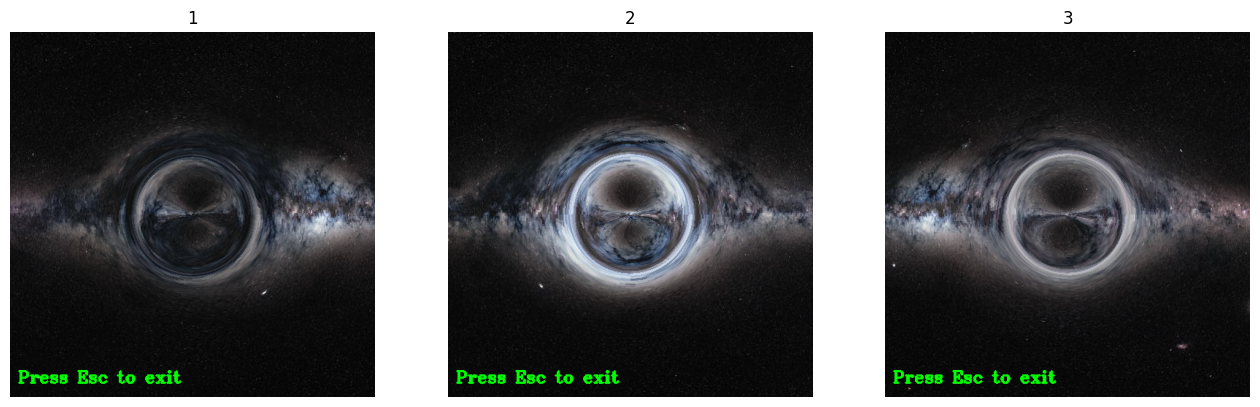

In [12]:
# read images into variables
frame1 = cv2.imread('./movie_screenshots/screenshot_300.png')
frame2 = cv2.imread('./movie_screenshots/screenshot_400.png')
frame3 = cv2.imread('./movie_screenshots/screenshot_500.png')

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax1.imshow(frame1)
ax1.set_title("1")

ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax2.imshow(frame2)
ax2.set_title("2")

ax3 = fig.add_subplot(133)
ax3.set_axis_off()
ax3.imshow(frame3)
ax3.set_title("3")

plt.show()
